###**Song Trends Analysis Project**


---

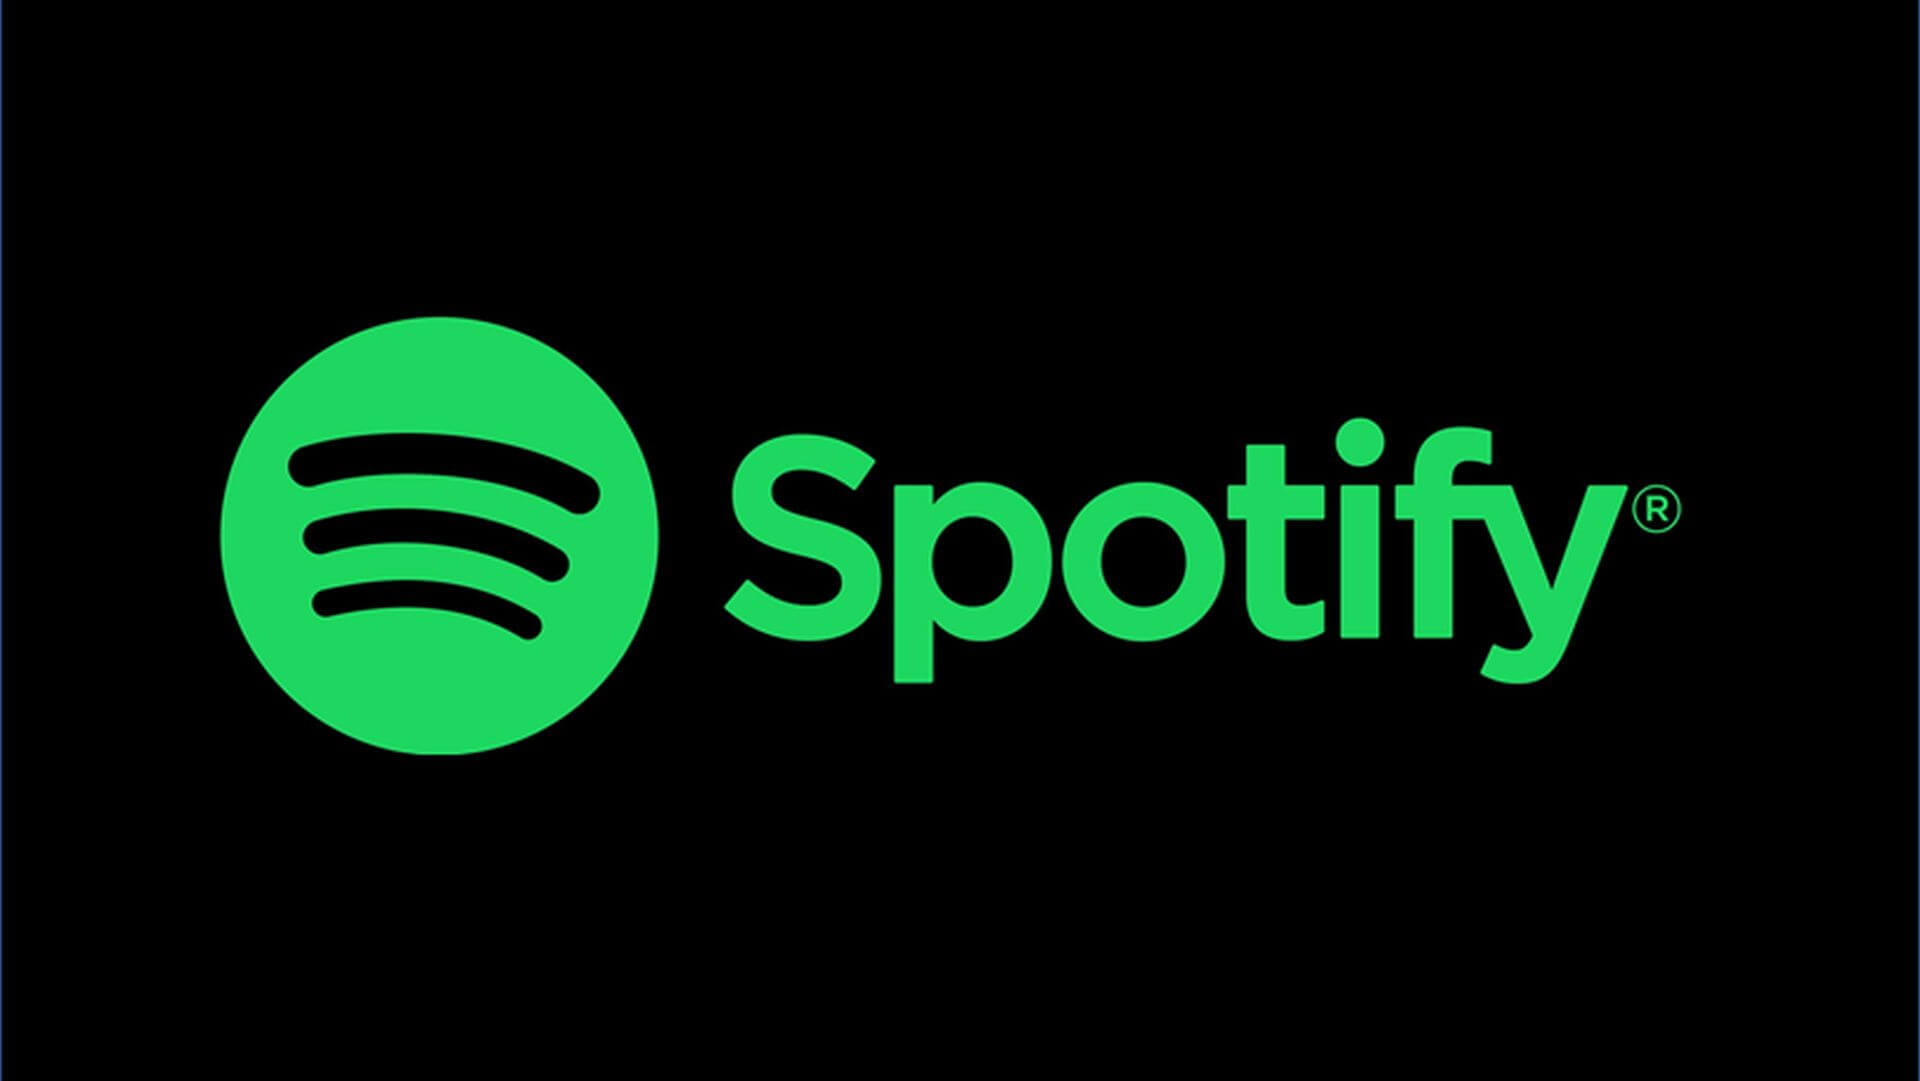

###**Intro**

---


Established in 2008, an innovative streaming music platform has revolutionized the way we listen and engage with music. Spotify has grown into a global sensation offering users millions of aural journeys through unlimited songs, podcasts, and playlists. This game-changing platform provides a diverse collection of music that allows one to effortlessly dive into the world of musical journeys. With millions of tracks at one's fingertips, everyone has the freedom to connect and explore their favorite artists, find new gems, and create a variety of playlists filled with endless satisfaction. <br>

Additionally, Spotify extends its advantages not only to the millions of users but also to artists, offering an abundance of benefits. With all this gratification, Spotify transparently showcases the number of streams and monthly listeners for every song and artist which allows users to understand artist recognition and popularity. This feature grants and empowers users with insights into which songs and artists are listened to by the community along with a dynamic indicator of trending and widely admired songs. As a result, our objective for this project aims to dive into the performance dynamics of songs and artists on this platform, using Python programming for analysis and speculation. Through this perspective, we believe that this analytical approach will reveal the answer to each song’s “popularity score.” <br>


By determining the secret behind each song’s “popularity score,” this equips us with insights into the combinations of algorithms, user data, engagement metrics, and various other factors managed on the platform. This endeavor allows a comprehensive understanding and analysis of the mechanisms that are used to drive success within Spotify. As a result, we will be able to gain the knowledge needed to assist and help Spotify in enhancing audience engagement and optimizing promotional efforts for a more enticing user experience. <br>

###**The Question**
---
How does Spotify determine which genre performs the best each year via popularity score? Are there any predictors that are correlated with the success rate, such as user engagement?


Unveiling the secret behind most popular songs involves a nuanced consideration of various factors. When it comes down to Spotify, this platform defines “popularity scores” as a proprietary metric used to gauge popularity amongst songs and artists on the platform. Each track is assigned a Spotify Popularity Index (SPI), a key determinant in calculating and estimating an artist’s overall popularity on the platform. As a result, this index is mainly influenced by recent stream counts, while also taking into consideration playlists, skip rates, and share rates which collectively contribute to the song’s overarching popularity score. Therefore, we believe that Spotify determines which genre performs the best through a combination of user engagement, algorithmic recommendations, and industry influence. As for the predictors, user engagement is a strong indicator of popular genres. This is because the number of streams a particular genre receives contributes powerfully to popularity. If users were to create playlists featuring a hot genre, it gains attention and boosts visibility of that genre to other users which then impacts algorithmic recommendations.

###**Key Steps**

---


To address this question, our initial step involves examining datasets encompassing genre, year, and popularity scores. To facilitate predictive analysis, we divide the data into four key steps:

1.   Collecting
(Importing the data and cleaning it up)
2.   Grouping (Groupinging the years)
3.   Popularity Score (Weeding out the genre from high to low with the popularity score)
4.   Visualizing and exploring (Assembling the data together for businness visualization purposes)




Prepare for a dive into the depths of the data!


###**1: Data Collection**


---



To address this inquiry, we explored Kaggle to discover a dataset aligning with our requirements. Our search yielded a dataset encompassing attributes such as duration, year, popularity, danceability, among others. However, recognizing that not all data within this file was suitable for our analysis, we conducted data cleanup by filtering entries from 2000 to 2020 as the genres are more relevant for trends to upcoming artists to know. The songs are organized according to their respective years, displaying a seamless comparison between each song and its corresponding time period.

Kaggle: [Top Hits Spotify from 2000-2020](https://www.kaggle.com/datasets/paradisejoy/top-hits-spotify-from-20002019) by Mark Koverha

With the link above we are able to download and import a dataset to analyze.

> ⚠ *Note: Before attempting to run the code, ensure you have downloaded and added the "SpotifyDataset.csv" file to this notebook.


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
#Reading the data set
SpotifyDataset = pd.read_csv("SpotifyDataset.csv")

#Let's see what the dataset looks like
SpotifyDataset.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [ ]:
# Cleaning up the Data Frame

# Filter the data set to show songs from 2000 to 2020
filtered_df = SpotifyDataset[SpotifyDataset['year'] >= 2000]

# Sort the Datafame by year
sortByYear = filtered_df.sort_values(by = 'year')
1
#Lets see how the dataset looks now
sortByYear.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
100,Shaggy,It Wasn't Me,227600,False,2000,76,0.853,0.606,0,-4.596,1,0.0713,0.0561,0.000000,0.3130,0.654,94.759,"hip hop, pop"
98,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5.707,1,0.0317,0.2620,0.000154,0.0669,0.966,95.026,pop
94,Joe,I Wanna Know,296693,False,2000,65,0.725,0.487,8,-5.959,0,0.0368,0.2600,0.000011,0.4310,0.599,136.086,"pop, R&B"
93,The Corrs,Breathless,207506,False,2000,68,0.607,0.820,11,-7.754,1,0.0597,0.0541,0.000068,0.2690,0.768,126.988,"pop, Folk/Acoustic"
91,Backstreet Boys,Shape of My Heart,230093,False,2000,70,0.575,0.786,9,-4.353,1,0.0296,0.2520,0.000000,0.1590,0.518,96.102,pop
89,Matchbox Twenty,Bent,256133,False,2000,54,0.518,0.830,6,-6.814,0,0.0386,0.0404,0.000004,0.3750,0.527,95.468,"pop, rock"
87,Erykah Badu,Bag Lady,348893,False,2000,54,0.724,0.416,5,-8.964,0,0.0841,0.3650,0.000000,0.0969,0.578,151.181,"hip hop, R&B"
86,*NSYNC,It's Gonna Be Me,191040,False,2000,60,0.644,0.874,0,-4.666,0,0.0801,0.0459,0.000002,0.0584,0.882,165.090,pop
84,All Saints,Pure Shores,268746,False,2000,62,0.631,0.664,6,-9.197,1,0.0242,0.0498,0.000420,0.0696,0.407,100.618,pop


###**2: Data Grouping**


---


Now that our data is clean and ready for examination, we'll proceed to group it by genre. However, we've observed an issue where a single song is associated with multiple genres. To accurately determine the number of unique genres, we must address this by splitting songs with multiple genres into separate rows.


In [ ]:
# Split the "genre" column by using the comma delimeter (',')
# Separate the genres into individual rows
# Strip any leading white spaces
df_genre_split = sortByYear.assign(genre = sortByYear['genre'].str.split(',').explode('genre').str.strip())

# Let's see how the DataFrame looks
df_genre_split.head(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
100,Shaggy,It Wasn't Me,227600,False,2000,76,0.853,0.606,0,-4.596,1,0.0713,0.0561,0.000000,0.3130,0.654,94.759,metal
98,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5.707,1,0.0317,0.2620,0.000154,0.0669,0.966,95.026,hip hop
94,Joe,I Wanna Know,296693,False,2000,65,0.725,0.487,8,-5.959,0,0.0368,0.2600,0.000011,0.4310,0.599,136.086,R&B
93,The Corrs,Breathless,207506,False,2000,68,0.607,0.820,11,-7.754,1,0.0597,0.0541,0.000068,0.2690,0.768,126.988,pop
91,Backstreet Boys,Shape of My Heart,230093,False,2000,70,0.575,0.786,9,-4.353,1,0.0296,0.2520,0.000000,0.1590,0.518,96.102,Dance/Electronic
89,Matchbox Twenty,Bent,256133,False,2000,54,0.518,0.830,6,-6.814,0,0.0386,0.0404,0.000004,0.3750,0.527,95.468,R&B
87,Erykah Badu,Bag Lady,348893,False,2000,54,0.724,0.416,5,-8.964,0,0.0841,0.3650,0.000000,0.0969,0.578,151.181,hip hop
86,*NSYNC,It's Gonna Be Me,191040,False,2000,60,0.644,0.874,0,-4.666,0,0.0801,0.0459,0.000002,0.0584,0.882,165.090,R&B
84,All Saints,Pure Shores,268746,False,2000,62,0.631,0.664,6,-9.197,1,0.0242,0.0498,0.000420,0.0696,0.407,100.618,pop


In [ ]:
# Find all the unique genre's in the genre column
unique_genres = df_genre_split['genre'].unique()

print(unique_genres)

['pop' 'metal' 'hip hop' 'R&B' 'Dance/Electronic' 'rock' 'latin'
 'Folk/Acoustic' 'country' 'easy listening' 'set()' 'World/Traditional'
 'blues' 'jazz']


After performing the genre split, we were able to identify the unique genres within the dataset. However, upon closer inspection, we detected a potential error in our code, as we encountered a genre labeled as "set()". To revise this, we undertook a data cleaning process while also determining the total count of distinct genres in the dataset.


In [ ]:
# What is 'set()'? That should not be there! This could be perhaps due to a dataset error?

remove_value = 'set()'

genre_list = np.delete(unique_genres, np.where(unique_genres == remove_value))

print(genre_list)

['pop' 'metal' 'hip hop' 'R&B' 'Dance/Electronic' 'rock' 'latin'
 'Folk/Acoustic' 'country' 'easy listening' 'World/Traditional' 'blues'
 'jazz']


In [ ]:
# How many unique genres are there in total?
count = 0
for x in genre_list:
    count += 1

count

13

###**3: Data Popularity Score**


---


With the data now grouped, we can calculate the average popularity score for each genre, subsequently sorting the results by their respective years. This analysis will provide us a comprehensive view of genre-specific popularity trends over time.


In [ ]:
# Find the average popularity score of each genre, sorted by year

average_popularity_score_df = pd.DataFrame(columns = ['year', 'pop', 'metal', 'hip hop', 'R&B', 'Dance/Electronic', 'rock', 'latin',
                                                   'Folk/Acoustic', 'country', 'easy listening', 'World/Traditional', 'blues', 'jazz'])

year_range = range(2000, 2021)

dfs_to_concat = []  # Create a list to store DataFrames for concatenation

for x in year_range:

    newRow = {}

    year = x

    for genre in genre_list:

        groupYear = df_genre_split[df_genre_split['year'] == x]

        sort = groupYear[groupYear['genre'] == genre]

        score = round(sort['popularity'].mean(), 2)

        newRow[genre] = score

    dfs_to_concat.append(pd.DataFrame([newRow]))

# Concatenate DataFrames in the list
average_popularity_score_df = pd.concat(dfs_to_concat, ignore_index=True)

# Fill all NaN (Not a Number) values with 0
average_popularity_score_df = average_popularity_score_df.fillna('💩')

# Let's see what the average popularity score of each genre is in each year
average_popularity_score_df

,pop,metal,hip hop,R&B,Dance/Electronic,rock,latin,Folk/Acoustic,country,easy listening,World/Traditional,blues,jazz
0,63.32,63.4,37.6,62.79,62.0,46.8,63.67,62.5,💩,💩,💩,💩,💩
1,60.12,61.8,58.5,58.38,59.6,64.0,49.0,30.5,58.33,💩,💩,💩,💩
2,61.84,59.33,63.87,63.88,63.2,60.86,💩,💩,💩,57.0,💩,💩,💩
3,57.61,56.0,61.32,58.29,66.0,58.43,66.0,48.0,💩,💩,💩,💩,💩
4,59.29,62.0,56.7,55.72,51.67,61.29,61.0,76.0,💩,61.0,💩,💩,💩
5,62.95,69.0,62.65,56.10,67.33,62.25,62.0,💩,💩,💩,46.0,64.0,60.0
6,60.05,39.57,55.48,64.53,48.33,66.12,1.0,💩,💩,💩,💩,💩,💩
7,58.31,70.0,55.53,63.16,63.0,65.29,💩,💩,💩,💩,68.0,💩,54.0
8,64.07,71.0,63.32,65.75,69.57,62.17,67.5,💩,66.0,51.0,60.0,💩,💩
9,62.49,60.67,60.6,61.08,65.67,46.0,61.5,60.0,72.5,💩,66.0,💩,💩


While developing the code for this section, we overlooked the possibility that certain years might not have data for specific genres, such as "country". As a result, we encountered some popularity scores marked as "NaN" (Not a Number). To enhance the visual presentation and make it easier to identify genres that are missing in a particular year, we decided to implement cosmetic changes. To address the issue of "NaN" values, we modified our approach by replacing these missing values with the poop emoji ("💩"). This adjustment not only improves the visibility of the numbers in our heatmap but also serves as a visual indicator, making it apparent which genres were not present for a given year. This change ensures a more informative and polished representation of the average popularity scores across genres and years in our visualization.


###**4: Data Visualization/Exploring**


---


When visualizing the data, we opted for a heat chart depicting the average popularity scores across genres and years. This chart serves as a visual representation, providing a clear snapshot of genre popularity for each year.


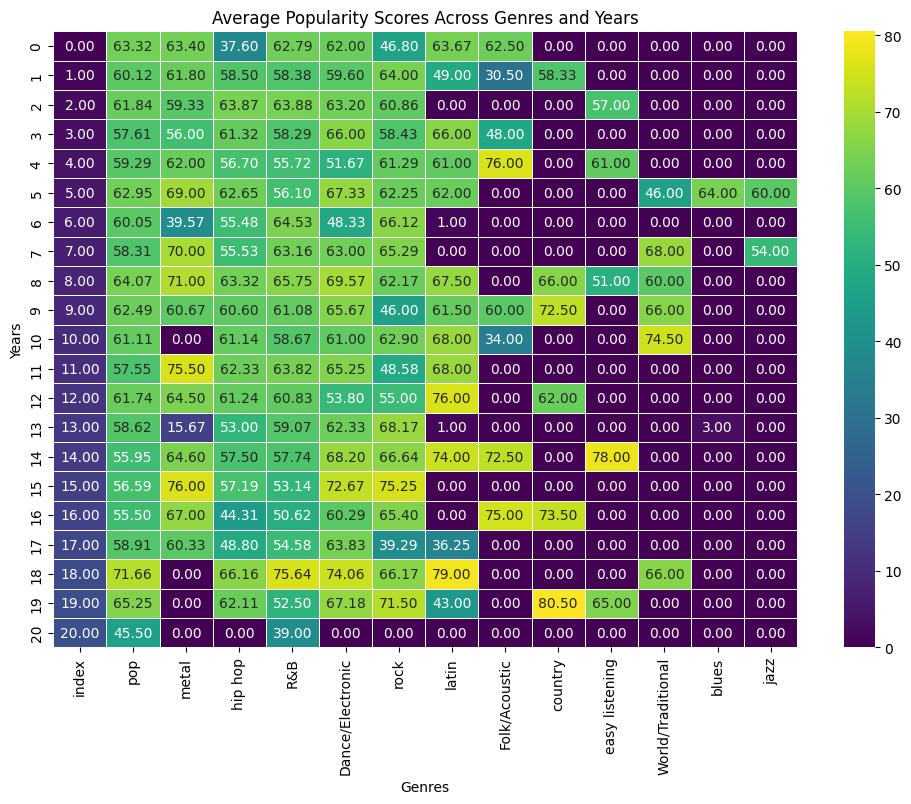

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set the 'year' column as the index for better visualization
average_popularity_score_df.reset_index(inplace=True)

# Convert string '0' back to numeric 0
average_popularity_score_df.replace('💩', 0, inplace=True)

# Convert the DataFrame to numeric values
average_popularity_score_df = average_popularity_score_df.apply(pd.to_numeric)

# Create a heatmap using Seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(average_popularity_score_df, cmap="viridis", annot=True, fmt=".2f", linewidths=.5)

plt.title('Average Popularity Scores Across Genres and Years')
plt.xlabel('Genres')
plt.ylabel('Years')

plt.show()

Furthermore, we can also visualze how each genre's average popularity score has changed over the years. This gives us a better represenntation on how these different genres can fall or gain relevancy. We also decided to use the genres from pop to rock as those genres displayed the most relevancy to look at for trends

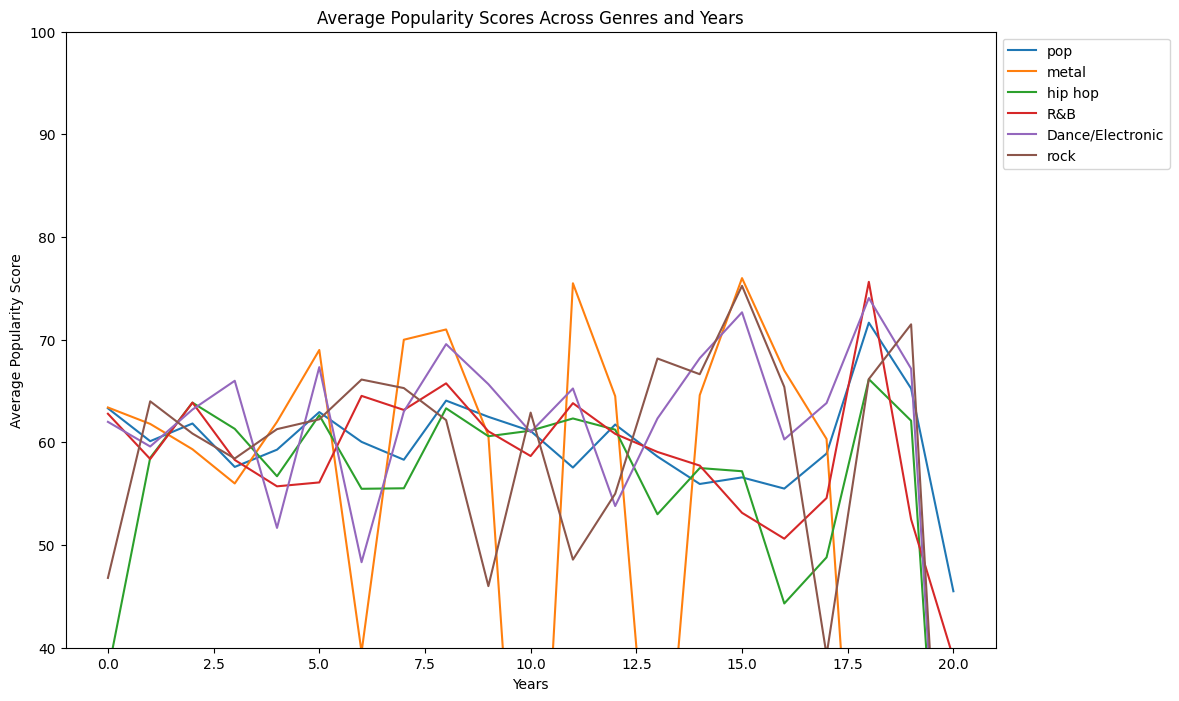

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a line graph
plt.figure(figsize=(12, 8))

# Using the most relevant genre's (the genre that had the most greens)
genres_to_plot = ['pop', 'metal', 'hip hop', 'R&B', 'Dance/Electronic', 'rock']

# Repeat genres to plot
for genre in genres_to_plot:
    plt.plot(average_popularity_score_df.index, average_popularity_score_df[genre], label=genre)

plt.title('Average Popularity Scores Across Genres and Years')
plt.xlabel('Years')
plt.ylabel('Average Popularity Score')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Add a legend to the right of the plot

# Setting a range to see the trends better
plt.ylim(40, 100)

plt.show()

###**Takeaways, Insights, and Conclusions**


---


Based on our comprehensive research, we have identified and found that pop was an exceptionally attractive and compelling genre to join as a musical artist. Our data analysis revealed to us that pop not only boasts widespread popularity but also consistently maintains an above-average score across all genres. As a result, the preferences of the Spotify community over the past couple of decades was pop considering it was a frontrunner with a majority of users engaging with this genre. If musical artists are seeking for popularity, they should establish themselves in the pop genre industry first. Furthermore, analyzing and presenting this data lies in its ability to empower artists to decide what music they want to create. By understanding the prevailing trends, artists can craft music and content that resonates and captivates the Spotify community. As a result, this enhances the artistic journey and ensures a more enjoyable experience for music enthusiasts on the platform. Therefore, we recommend that joining pop will allow an arist to make it big.

Delving deeper into our analysis and examining the data more thoroughly, we identified extracting trends from our charts. As a result, our data revealed that R&B exhibited performance metrics on par with the pop genre. Therefore, we determined that a comprehensive examination of trends spanning the last two decades shows that artists should collect and research their information to see which genre has the best potential. The popularity of R&B throughout the years shows that this serves as a compelling rationale for musical artists to grasp the evolving preferences of the Spotify community.

Additionally, after reviewing our data analysis, we propose that artists explore collaborations with influential artists who are capable of creating substantial attraction. By incorporating Spotify’s data into a strategic approach to artists within a specific genre can serve as a market strategy. As a result, this method positions an artist to potentially join the spotlight through strategic partnerships using our analysis and research from Spotify.

All in all, after finalizing and researching the analysis of this project, we understand the importance of how coding information helps individuals and the company become better as one.



---